## Group Number: 9
## Names: Aaryan, Sanika, Neelakshi 
## Project Name: VPN Classification

In [18]:
# Importing Files
import pandas as pd
from imblearn.over_sampling import ADASYN
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, f1_score
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
import seaborn as sns

In [2]:
root_path = '/content/drive/MyDrive/Colab Notebooks/CS513/'

In [3]:
#Loading the dataset
dataset = pd.read_csv(root_path + 'processed_data.csv')
print(dataset.shape)
dataset.head()

(148259, 21)


,bruteforce,crawl,exploit,scan,spam,database,ftp,http,pop3/imap,sip,...,ssh,tcp,telnet,windows,port_22,port_443,port_7777,port_80,open_ports_count,label
0,0.000000,0.0,0.000000,0.500000,0.500000,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.266667,0.0,0.466667,0.033333,0.233333,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.000000,0.0,0.000000,0.931034,0.068966,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.080000,0.0,0.600000,0.040000,0.280000,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.235294,0.0,0.455882,0.058824,0.250000,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
#train test split
train, test = train_test_split(dataset, test_size=0.3)

In [5]:
X_train_raw = train.drop(["label"], axis=1)
y_train_raw = train["label"]
X_test_raw = test.drop(["label"], axis=1)
y_test_raw = test["label"]

print(X_train_raw.shape, y_train_raw.shape, X_test_raw.shape, y_test_raw.shape)
print(y_train_raw.value_counts())
print(y_test_raw.value_counts())

(103781, 20) (103781,) (44478, 20) (44478,)
0    101758
1      2023
Name: label, dtype: int64
0    43611
1      867
Name: label, dtype: int64


In [6]:
#under and oversampling the data
under = RandomUnderSampler(replacement=False)
over = ADASYN(n_neighbors = 10, n_jobs=-1)

In [7]:
X_train, y_train = over.fit_resample(X_train_raw, y_train_raw)
X_test, y_test = under.fit_resample(X_test_raw, y_test_raw)

/usr/local/lib/python3.10/dist-packages/imblearn/over_sampling/_adasyn.py:156: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


In [8]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)
print(y_train.value_counts())
print(y_test.value_counts())

(203530, 20) (203530,) (1734, 20) (1734,)
1    101772
0    101758
Name: label, dtype: int64
0    867
1    867
Name: label, dtype: int64


# **Model**

In [9]:
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dropout(0.2))  # Adding dropout for regularization
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))  # Assuming binary classification, hence 1 neuron with sigmoid activation


In [10]:
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])


In [11]:
#Training the model
history = model.fit(X_train, y_train, batch_size=128, epochs=40, validation_split=0.1)


Epoch 1/40
1432/1432 [==============================] - 20s 5ms/step - loss: 0.2978 - accuracy: 0.8858 - val_loss: 0.3402 - val_accuracy: 0.8710
Epoch 2/40
1432/1432 [==============================] - 7s 5ms/step - loss: 0.2421 - accuracy: 0.9064 - val_loss: 0.2925 - val_accuracy: 0.8813
Epoch 3/40
1432/1432 [==============================] - 6s 4ms/step - loss: 0.2270 - accuracy: 0.9141 - val_loss: 0.2830 - val_accuracy: 0.8767
Epoch 4/40
1432/1432 [==============================] - 6s 4ms/step - loss: 0.2162 - accuracy: 0.9182 - val_loss: 0.2818 - val_accuracy: 0.8880
Epoch 5/40
1432/1432 [==============================] - 7s 5ms/step - loss: 0.2086 - accuracy: 0.9213 - val_loss: 0.2676 - val_accuracy: 0.8941
Epoch 6/40
1432/1432 [==============================] - 6s 4ms/step - loss: 0.2020 - accuracy: 0.9243 - val_loss: 0.2458 - val_accuracy: 0.9115
Epoch 7/40
1432/1432 [==============================] - 7s 5ms/step - loss: 0.1982 - accuracy: 0.9269 - val_loss: 0.2318 - val_accuracy

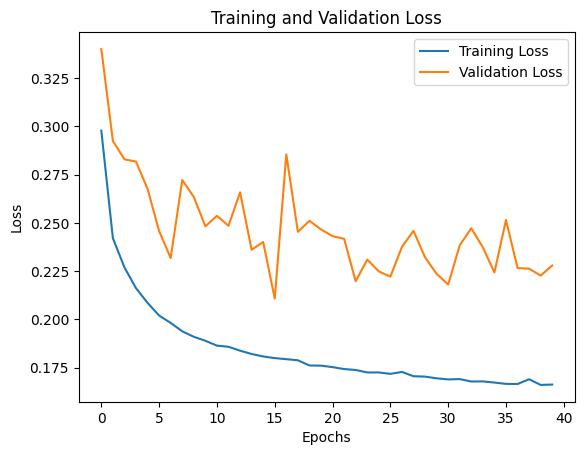

In [12]:
#plotting losses
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [14]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy}")

55/55 [==============================] - 0s 3ms/step - loss: 0.2924 - accuracy: 0.9216
Test Accuracy: 0.9215686321258545


In [15]:
y_pred = model.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)

55/55 [==============================] - 0s 2ms/step


In [19]:
print("F1 Score:")
print(f1_score(y_test, y_pred_binary))

F1 Score:
0.9207459207459208


In [16]:
print("Classification Report:")
print(classification_report(y_test, y_pred_binary))


Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.93      0.92       867
           1       0.93      0.91      0.92       867

    accuracy                           0.92      1734
   macro avg       0.92      0.92      0.92      1734
weighted avg       0.92      0.92      0.92      1734



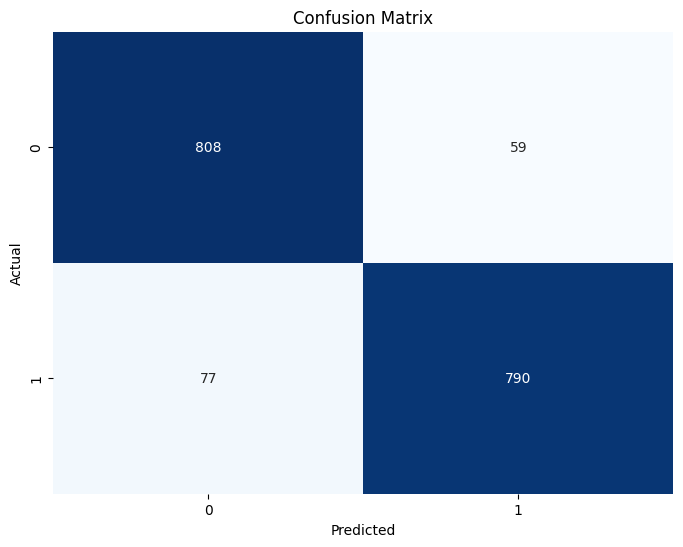

In [17]:
conf_matrix = confusion_matrix(y_test, y_pred_binary)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()